+----------+-----+--------+--------+--------------------+------------------+----------+-------------+-------------+----+
|      Date|SP500|Dividend|Earnings|Consumer Price Index|Long Interest Rate|Real Price|Real Dividend|Real Earnings|PE10|
+----------+-----+--------+--------+--------------------+------------------+----------+-------------+-------------+----+
|1871-01-01| 4.44|    0.26|     0.4|               12.46|              5.32|      89.0|         5.21|         8.02|null|
|1871-02-01|  4.5|    0.26|     0.4|               12.84|              5.32|     87.53|         5.06|         7.78|null|
|1871-03-01| 4.61|    0.26|     0.4|               13.03|              5.33|     88.36|         4.98|         7.67|null|
|1871-04-01| 4.74|    0.26|     0.4|               12.56|              5.33|     94.29|         5.17|         7.96|null|
|1871-05-01| 4.86|    0.26|     0.4|               12.27|              5.33|     98.93|         5.29|         8.14|null|
|1871-06-01| 4.82|    0.26|     

+----+------------------+-------------------+-------------------+------------------------+----------------------+------------------+------------------+------------------+------------------+
|year|        avg_sp5000|       avg_dividend|       avg_earnings|max_consumer_price_index|avg_long_interest_rate|    avg_real_price| avg_real_dividend|  avg_real_earning|          avg_pe10|
+----+------------------+-------------------+-------------------+------------------------+----------------------+------------------+------------------+------------------+------------------+
|1871| 4.691666666666667|0.25999999999999995|0.39999999999999997|      12.398333333333333|     5.338333333333335| 94.62416666666665| 5.240833333333334|             8.065|            16.851|
|1872| 5.029166666666667| 0.2816666666666667| 0.4158333333333333|      12.921666666666667|     5.460833333333333| 97.21833333333335| 5.445833333333334|            8.0475|            16.851|
|1873| 4.801666666666667|0.31666666666666665|0.446

+----+-----+------------------+-------------------+-------------------+------------------------+----------------------+------------------+------------------+------------------+------------------+
|year|group|        avg_sp5000|       avg_earnings|       avg_dividend|max_consumer_price_index|avg_long_interest_rate|    avg_real_price| avg_real_dividend|  avg_real_earning|          avg_pe10|
+----+-----+------------------+-------------------+-------------------+------------------------+----------------------+------------------+------------------+------------------+------------------+
|1871|    0| 4.691666666666667|0.39999999999999997|0.25999999999999995|      12.398333333333333|     5.338333333333335| 94.62416666666665| 5.240833333333334|             8.065|            16.851|
|1872|    0| 5.029166666666667| 0.4158333333333333| 0.2816666666666667|      12.921666666666667|     5.460833333333333| 97.21833333333335| 5.445833333333334|            8.0475|            16.851|
|1873|    0| 4.80166

+-----+------+------------+------------+------------------------+----------------------+--------------+-----------------+----------------+--------+
|group|avg_sp|avg_dividend|avg_earnings|max_consumer_price_index|avg_long_interest_rate|avg_real_price|avg_real_dividend|avg_real_earning|avg_pe10|
+-----+------+------------+------------+------------------------+----------------------+--------------+-----------------+----------------+--------+
|    0|  4.71|         0.3|        0.43|                   12.24|                  5.29|         96.12|             6.16|            8.71|   16.85|
|    1|  3.98|        0.23|        0.34|                    9.47|                  4.24|        105.86|             6.02|            9.07|   16.85|
|    2|  5.43|        0.31|        0.39|                    9.31|                  3.59|        145.33|             8.24|           10.41|   15.31|
|    3|  5.34|        0.23|        0.31|                     7.9|                  3.51|        168.96|         

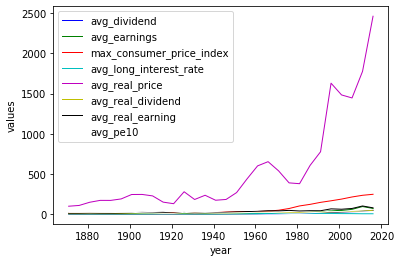

<Figure size 864x360 with 0 Axes>

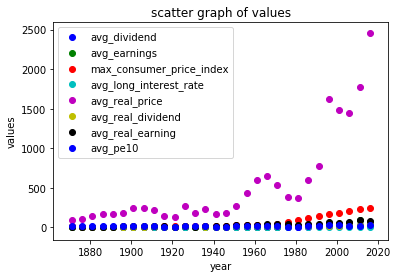

<Figure size 864x360 with 0 Axes>

In [13]:
#"""------------------------------Cleaning null values of a csv file---------------------------------------"""
#------------------------------------------------------------------------------------------------------------
#Program to clean null values and fill them with average of previous two values
#Module : 
#Author :
#Date :
#------------------------------------------------------------------------------------------------------------
import sys
from pyspark.sql import SparkSession , SQLContext
from pyspark import SparkContext as sc, SparkConf
from pyspark.sql import functions as F
from pyspark.sql.types import DataType,IntegerType
from pyspark.sql.window import Window
import pandas as pd
from matplotlib import pyplot as plt

#================Function for cleaning null values=================
def clean_Null():
    #creating spark session
    spk_session=SparkSession.builder.appName('Fit_PSSQLApp01').getOrCreate()
  
    #reading csv file and creating a data frame
    df = spk_session.read.format('csv').option('header',True).load('C:/Users/alakuntla raju/Downloads/data_csv.csv')
 
    df.show()

    #Adding a column to have a hold on current row
    df = df.withColumn("Serial no",F.monotonically_increasing_id()+1)

    #using filter() and isNull() are helpful in finding out if there exists any null values
    #checking each columns existence for null values 
    if (df.filter(df["Earnings"].isNull())):
        #calling clean_Null_Values_Of_Earnings()
        df = clean_Null_of_Earnings(df)
    if (df.filter(df["SP500"].isNull())):
        #calling clean_Null_Values_Of_Earnings()
        df = clean_Null_Values_Of_SP500(df)
  
    if (df.filter(df["Long Interest Rate"].isNull())):
        #calling clean_Null_Values_Of_Earnings()
        df = clean_Null_Values_Of_Long_Interest_Rate(df)

    if (df.filter(df["Consumer Price Index"].isNull())):
        #calling clean_Null_Values_Of_Consumer_Price_Index()
        df = clean_Null_Values_Of_Consumer_Price_Index(df)

    if (df.filter(df["Real Earnings"].isNull())):
        #calling clean_Null_values_Of_RealEarnings()
        df = clean_Null_values_Of_RealEarnings(df)

    if (df.filter(df["Dividend"].isNull())):
        #calling clean_Null_values_Of_RealEarnings()
        df = clean_Null_values_Of_Dividend(df)
  
    if (df.filter(df["Real Price"].isNull())):
        #calling clean_Null_values_Of_Real_Price()
        df = clean_Null_values_Of_Real_Price(df)

    if (df.filter(df["Real Dividend"].isNull())):
        #calling clean_Null_values_Of_RealEarnings()
        df = clean_Null_values_Of_RealDividend(df)
  
    if (df.filter(df["PE10"].isNull())):
        df_avg = df.agg(F.avg(F.col("PE10")))
        df_avg.show()
        df = df.na.fill("16.851",["PE10"])
        df=df.drop("Serial no")

    df.show()

    #creating a new csv fill without null values(cleaned data) using data_frame (df)
    #create_cleaned_csv(df)
  
#================Function for cleaning null values of Earnings column=================
def clean_Null_of_Earnings(df):
    df = df.withColumn('cumsum', F.sum('Earnings').over(Window.partitionBy().orderBy('Serial no').rowsBetween(-sys.maxsize, 0)))
    df=df.withColumn("E1",F.col("cumsum")/F.col("Serial no"))
    condition_col = (F.col('Earnings').isNull())
    df = df.withColumn('Earnings', F.when(condition_col, F.col('E1')).otherwise(F.col('Earnings')))
    df=df.drop("cumsum","E1")
    return df
  
#================Function for cleaning null values of SP500 column=================
def clean_Null_Values_Of_SP500(df):
    df = df.withColumn('cumsum', F.sum('SP500').over(Window.partitionBy().orderBy('Serial no').rowsBetween(-sys.maxsize, 0)))
    df=df.withColumn("E1",F.col("cumsum")/F.col("Serial no"))
    condition_col = (F.col('SP500').isNull())
    df = df.withColumn('SP500', F.when(condition_col, F.col('E1')).otherwise(F.col('SP500')))
    df=df.drop("cumsum","E1")
    return df

#================Function for cleaning null values of Consumer Price Index column=================
def clean_Null_Values_Of_Consumer_Price_Index(df):
    df = df.withColumn('cumsum', F.sum('Consumer Price Index').over(Window.partitionBy().orderBy('Serial no').rowsBetween(-sys.maxsize, 0)))
    df=df.withColumn("E1",F.col("cumsum")/F.col("Serial no"))
    condition_col = (F.col('Consumer Price Index').isNull())
    df = df.withColumn('Consumer Price Index', F.when(condition_col, F.col('E1')).otherwise(F.col('Consumer Price Index')))
    df=df.drop("cumsum","E1")
    return df

#================Function for cleaning null values of Long Interest Rate column=================
def clean_Null_Values_Of_Long_Interest_Rate(df):
    df = df.withColumn('cumsum', F.sum('Long Interest Rate').over(Window.partitionBy().orderBy('Serial no').rowsBetween(-sys.maxsize, 0)))
    df=df.withColumn("E1",F.col("cumsum")/F.col("Serial no"))
    condition_col = (F.col('Long Interest Rate').isNull())
    df = df.withColumn('Long Interest Rate', F.when(condition_col, F.col('E1')).otherwise(F.col('Long Interest Rate')))
    df=df.drop("cumsum","E1")
    return df

#================Function for cleaning null values of Real Price column=================
def clean_Null_values_Of_Real_Price(df):
    df = df.withColumn('cumsum', F.sum('Real Price').over(Window.partitionBy().orderBy('Serial no').rowsBetween(-sys.maxsize, 0)))
    df=df.withColumn("E1",F.col("cumsum")/F.col("Serial no"))
    condition_col = (F.col('Real Price').isNull())
    df = df.withColumn('Real Price', F.when(condition_col, F.col('E1')).otherwise(F.col('Real Price')))
    df=df.drop("cumsum","E1")
    return df

#================Function for cleaning null values of Real Earnings=================
def clean_Null_values_Of_RealEarnings(df):
    df = df.withColumn('cumsum', F.sum('Real Earnings').over(Window.partitionBy().orderBy('Serial no').rowsBetween(-sys.maxsize, 0)))
    df=df.withColumn("E1",F.col("cumsum")/F.col("Serial no"))
    condition_col = (F.col('Real Earnings').isNull())
    df = df.withColumn('Real Earnings', F.when(condition_col, F.col('E1')).otherwise(F.col('Real Earnings')))
    df=df.drop("cumsum","E1")
    return df

#================Function for cleaning null values of Dividend======================
def clean_Null_values_Of_Dividend(df):
    df = df.withColumn('cumsum', F.sum('Dividend').over(Window.partitionBy().orderBy('Serial no').rowsBetween(-sys.maxsize, 0)))
    df=df.withColumn("E1",F.col("cumsum")/F.col("Serial no"))
    condition_col = (F.col('Dividend').isNull())
    df = df.withColumn('Dividend', F.when(condition_col, F.col('E1')).otherwise(F.col('Dividend')))
    df=df.drop("cumsum","E1")
    return df

#================Function for cleaning null values of Real Dividend=================
def clean_Null_values_Of_RealDividend(df):
    df = df.withColumn('cumsum', F.sum('Real Dividend').over(Window.partitionBy().orderBy('Serial no').rowsBetween(-sys.maxsize, 0)))
    df=df.withColumn("E1",F.col("cumsum")/F.col("Serial no"))
    condition_col = (F.col('Real Dividend').isNull())
    df = df.withColumn('Real Dividend',F.when(condition_col, F.col('E1')).otherwise(F.col('Real Dividend')))
    df=df.drop("cumsum","E1")
    return df

#===============Function for creating a new csv file=================================
#def create_cleaned_csv(df):
    #df.write.csv('cleaned_data1.csv', header= True)

#calling clean_Null() function 
clean_Null()
def preparing_fiveyear_data():
    spk_session=SparkSession.builder.appName('Fit_PSSQLApp01').getOrCreate()
    df2 = spk_session.read.format('csv').option('header',True).load('C:/Users/alakuntla raju/data2.csv')
    df2 = df2.withColumn('id',F.monotonically_increasing_id())
    df2.show()
    df2 = df2.withColumn('year',F.year(df2['date']))
    df2.show()
    # df2.groupby('year').agg(F.avg('Dividend').alias("a_div")).orderBy('year').show()
    df2 = df2.groupBy("year").agg(F.avg("SP500").alias("avg_sp5000"),F.avg("Dividend").alias("avg_dividend"), \
         F.avg("Earnings").alias("avg_earnings"), \
         F.avg("Consumer Price Index").alias("max_consumer_price_index"), \
         F.avg("Long Interest Rate").alias("avg_long_interest_rate"), \
         F.avg("Real Price").alias("avg_real_price"), \
         F.avg("Real Dividend").alias("avg_real_dividend"), \
         F.avg("Real Earnings").alias("avg_real_earning"), \
         F.avg("PE10").alias("avg_pe10"), \
     ) \
    .orderBy('Year')
    df2.show(148)
    df2 = df2.withColumn('id',F.monotonically_increasing_id())
    group_size = 5
    w = Window.orderBy('id')
    df2 = df2.withColumn('group', F.floor((F.row_number().over(w) - 1) / group_size))\
    .select('year','group','avg_sp5000','avg_earnings','avg_dividend','max_consumer_price_index','avg_long_interest_rate','avg_real_price','avg_real_dividend','avg_real_earning','avg_pe10')
    df2.show(148)
    df2=df2.groupBy('group').agg(F.round(F.avg('avg_sp5000'),2).alias('avg_sp'),\
                         F.round(F.avg('avg_dividend'),2).alias('avg_dividend'),\
                         F.round(F.avg('avg_earnings'),2).alias('avg_earnings'),\
                         F.round(F.avg('max_consumer_price_index'),2).alias('max_consumer_price_index'),\
                         F.round(F.avg('avg_long_interest_rate'),2).alias('avg_long_interest_rate'),\
                         F.round(F.avg('avg_real_price'),2).alias('avg_real_price'),\
                         F.round(F.avg('avg_real_dividend'),2).alias('avg_real_dividend'),\
                         F.round(F.avg('avg_real_earning'),2).alias('avg_real_earning'),\
                         F.round(F.avg('avg_pe10'),2).alias('avg_pe10'))
    df2.show()
    df2=df2.withColumnRenamed('group','year')
    df2=df2.withColumn('year',5*F.col('year')+1871)
    # df2=df2.withColumn('year',F.regexp_replace('year','0','1871-1875'))//replaces a particular mentioned value wherever the condition becomes true
    df2.show(30)
    #df2.write.csv("five_year_avg143.csv",header=True)
preparing_fiveyear_data()

sample_data=pd.read_csv('C:/Users/alakuntla raju/Desktop/rajucleaneddata.csv')
plt.plot(sample_data.year, sample_data.avg_dividend,color='b',linewidth=1)
plt.plot(sample_data.year, sample_data.avg_earnings,color='g',linewidth=1)
plt.plot(sample_data.year, sample_data.max_consumer_price_index,color='r',linewidth=1)
plt.plot(sample_data.year, sample_data.avg_long_interest_rate,color='c',linewidth=1)
plt.plot(sample_data.year, sample_data.avg_real_price,color='m',linewidth=1)
plt.plot(sample_data.year, sample_data.avg_real_dividend,color='y',linewidth=1)
plt.plot(sample_data.year, sample_data.avg_real_earning,color='k',linewidth=1)
plt.plot(sample_data.year, sample_data.avg_pe10,color='w',linewidth=1)

plt.legend(['avg_dividend', 'avg_earnings','max_consumer_price_index','avg_long_interest_rate','avg_real_price','avg_real_dividend','avg_real_earning','avg_pe10'])
plt.xlabel('year')
plt.ylabel('values')
plt.figure(figsize=(12,5))
plt.show()

plt.scatter(sample_data.year, sample_data.avg_dividend,color='b',linewidth=1)
plt.scatter(sample_data.year, sample_data.avg_earnings,color='g',linewidth=1)
plt.scatter(sample_data.year, sample_data.max_consumer_price_index,color='r',linewidth=1)
plt.scatter(sample_data.year, sample_data.avg_long_interest_rate,color='c',linewidth=1)
plt.scatter(sample_data.year, sample_data.avg_real_price,color='m',linewidth=1)
plt.scatter(sample_data.year, sample_data.avg_real_dividend,color='y',linewidth=1)
plt.scatter(sample_data.year, sample_data.avg_real_earning,color='k',linewidth=1)
plt.scatter(sample_data.year, sample_data.avg_pe10,color='b',linewidth=1)

plt.legend(['avg_dividend', 'avg_earnings','max_consumer_price_index','avg_long_interest_rate','avg_real_price','avg_real_dividend','avg_real_earning','avg_pe10'])
plt.xlabel('year')
plt.ylabel('values')
plt.title('scatter graph of values')
plt.figure(figsize=(12,5))
plt.show()

